In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import time

1. Write a python program which searches all the product under a particular product vertical
from www.amazon.in. The product verticals to be searched will be taken as input from user.
For e.g. If user input is ‘guitar’. Then search for guitars.


In [15]:
driver= webdriver.Chrome("chromedriver.exe")
url='https://www.amazon.in/ref=nav_logo'
driver.get(url)

In [16]:
pro=input('Product name:')
item_search=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
item_search.send_keys(pro)
find=driver.find_element_by_id('nav-search-submit-button')
find.click()

Product name:smart phone


2. In the above question, now scrape the following details of each product listed in first 3 pages 
of your search results and save it in a data frame and csv. In case if any product vertical has 
less than 3 pages in search results then scrape all the products available under that product 
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of 
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" 
and “Product URL”. In case, if any of the details are missing for any of the product then 
replace it by “-“.

In [17]:
next_urls=[]
url_tags=driver.find_elements_by_xpath('//div[@class="a-section a-spacing-large a-spacing-top-large a-text-center s-pagination-container"]//a')
for i in url_tags[ :3]:
    next_urls.append(i.get_attribute('href'))
next_urls    

['https://www.amazon.in/s?k=smartphone&page=2&qid=1629446650&ref=sr_pg_2',
 'https://www.amazon.in/s?k=smartphone&page=3&qid=1629446650&ref=sr_pg_3',
 'https://www.amazon.in/s?k=smartphone&page=2&qid=1629446650&ref=sr_pg_1']

In [18]:
product_name=[]
for i in next_urls:
    driver.get(i)
    pro_tag=driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]')
    for i in pro_tag:
        product_name.append(i.text)
price=[]
for i in next_urls:
    driver.get(i)
    pri=driver.find_elements_by_xpath('//span[@class="a-price-whole"]')
    for i in pri:
        price.append(i.text)
expected_delivery=[]
for i in next_urls:
    driver.get(i)
    deli=driver.find_elements_by_xpath('//span[@class="a-text-bold"]')
    for i in deli:
        expected_delivery.append(i.text)  
product_url=[]
for i in next_urls:
    driver.get(i)
    p_u=driver.find_elements_by_xpath('a[@class="a-link-normal a-text-normal"]')
    for i in p_u:
        product_url.append(i.get__attribute('href'))         

In [21]:
amazon_phones=pd.DataFrame()
amazon_phones['product_name']=product_name[:30]
amazon_phones['price']=price[:30]
amazon_phones['expected_delivery']=expected_delivery[:30]
amazon_phones

,product_name,price,expected_delivery
0,"Samsung Galaxy M31 (Space Black, 6GB RAM, 128G...","14,999","Tuesday, August 24"
1,"Vivo V21e 5G (Dark Pearl, 8GB RAM, 128GB Stora...","24,990","Wednesday, August 25"
2,"Panasonic Eluga i7 (2GB RAM, 16GB Storage, Fin...","5,798","Thursday, August 26"
3,"Samsung Galaxy M02 (Black,2GB RAM, 32GB Storage)","7,999","Friday, August 27"
4,"Redmi 9A (Nature Green, 3GB Ram, 32GB Storage)...","7,999","Wednesday, August 25"
5,"OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...","29,999","Wednesday, August 25"
6,"Panasonic Eluga I8 (Black, 3GB RAM, 32GB Storage)","6,989","Thursday, August 26"
7,"itel A47 (Cosmic Purple, 2GB RAM, 32GB Storage...","5,499","Friday, August 27"
8,Ziox Astra NXT 4 Inch Marshmallow 512MB & 4GB ...,"2,590","Tuesday, August 24"
9,"realme narzo 30 (Racing Sliver, 4GB RAM, 64GB ...","12,999","Thursday, August 26"


3. Write a python program to access the search bar and search button on images.google.com and 
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [22]:
driver=webdriver.Chrome("chromedriver.exe") 
url = "https://images.google.com/"
driver.get(url)


In [35]:
search_bar = driver.find_element_by_xpath('//html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input') 

In [36]:
search_bar.send_keys("fruits")

In [38]:
search_button = driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')

In [39]:
search_button.click()

In [41]:
#for sracping the fruit images tags
fruit_i=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
fruit_i[0:100]  

[<selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="062b3283-36f8-4597-860e-3c85a0ce44dc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="d09f214a-61e0-42a4-91b2-a522d1f2ab64")>,
 <selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="f557b25e-2ef4-4807-be9b-3e43bafe98d1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="3c2e80ca-2c39-44fa-bbe8-97d33232a37b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="f0299a75-c33b-432e-a18e-a8022c05f177")>,
 <selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="a7a5e64c-a7e5-46d6-8c3d-e866bb1c4a77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="33e18db4a8527341eade13f0f4c26f6b", element="c70f71a2-1000-47d3-8ffa-f4

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
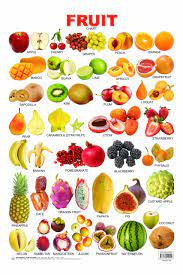
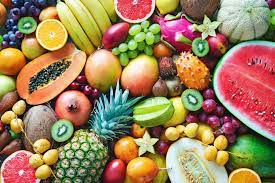
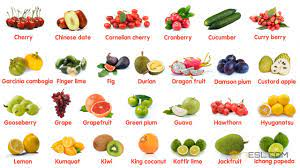
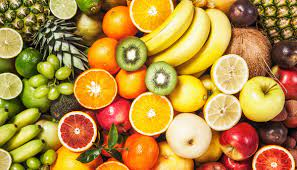
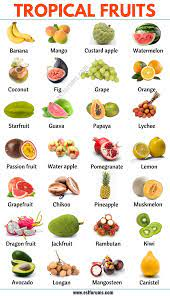
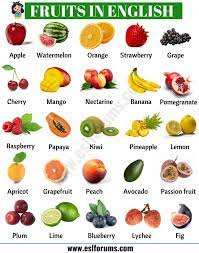
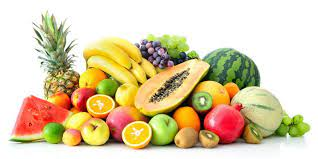
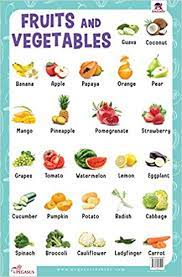
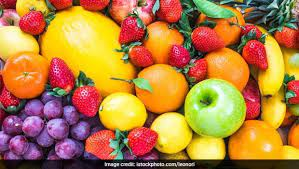
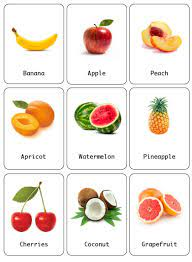
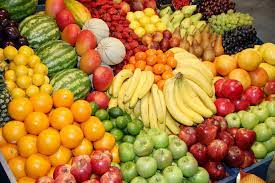
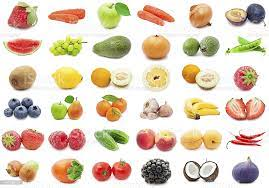
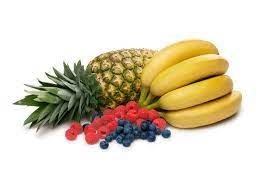
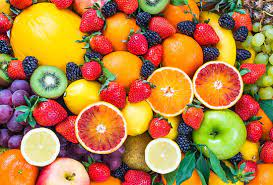
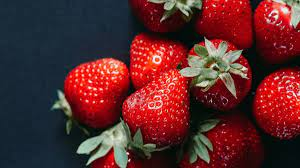
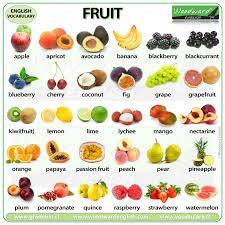
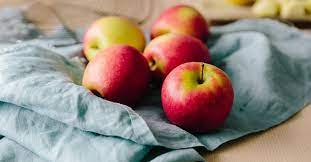
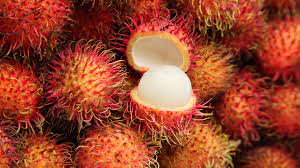
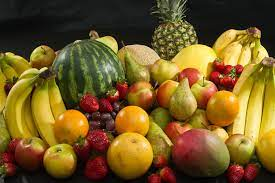
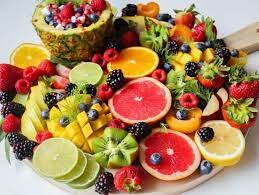

In [42]:
fruit_img=[]
for i in fruit_i:
    SRC_tag=i.get_attribute('src')
    fruit_img.append(SRC_tag)
fruit_img[0:100]

In [43]:
driver=webdriver.Chrome("chromedriver.exe") 
url = "https://images.google.com/"
driver.get(url)

In [44]:
search_bar = driver.find_element_by_xpath('//html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input') 

In [45]:
search_bar.send_keys("Cars")

In [46]:
search_button = driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')

In [47]:
search_button.click()

In [48]:
#for sracping the car images tags
cars_i=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
cars_i[0:100]

[<selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="0c4775fa-f2b8-4513-bdbc-5cb6dbd42732")>,
 <selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="6fa399e6-dc79-43f6-afe3-6c2a70180bef")>,
 <selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="82b519c1-8f45-4733-acb6-9a6124e53e9c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="73371124-088e-41c1-90ff-d712281f4183")>,
 <selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="7c8c6b0c-f3eb-49d4-889d-e96456e06a1f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="359525ce-9d7c-4fcf-86b2-13414709ec3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="61e9f76dab2171cc24b029ad6029d0b5", element="a334db55-56d6-4bde-aeb1-5a

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQx6Y26YOjgzDm8RNQL3V0oa3ZqrYhfHmnLyA&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
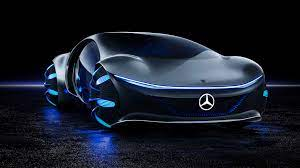
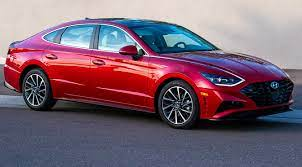
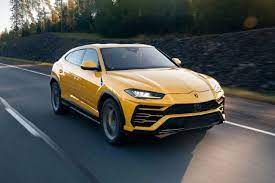
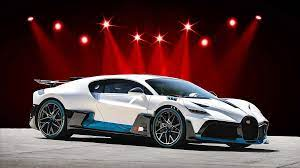
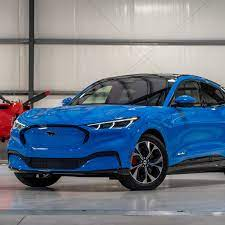
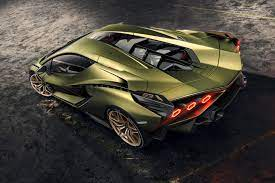
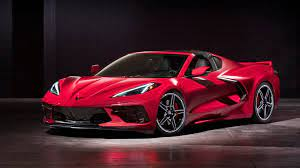
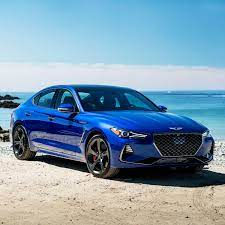
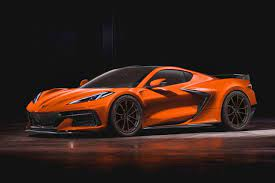
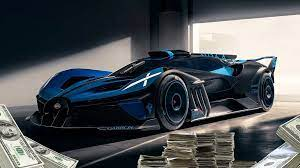
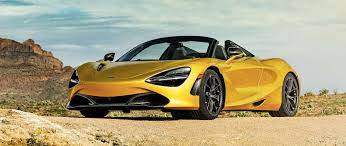
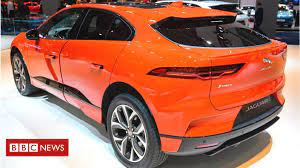
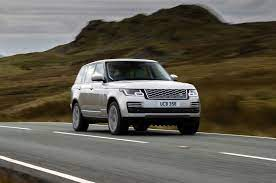
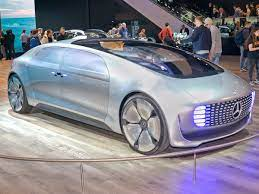
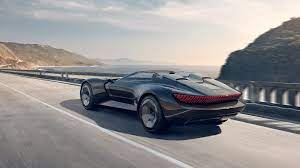
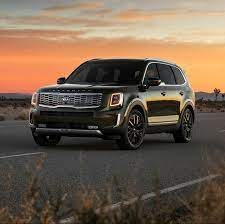
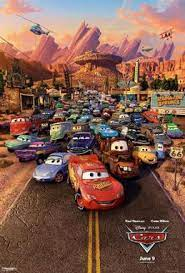
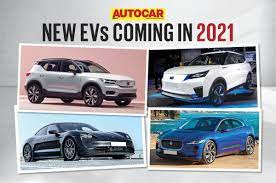
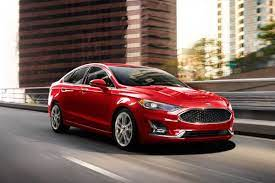
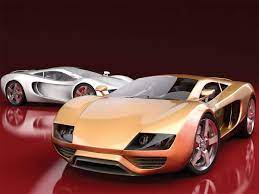

In [49]:
cars_img=[]
for i in cars_i:
    SRC_tag=i.get_attribute('src')
    cars_img.append(SRC_tag)
cars_img[0:100]

In [52]:
driver=webdriver.Chrome("chromedriver.exe") 
url = "https://images.google.com/"
driver.get(url)

In [53]:
search_bar = driver.find_element_by_xpath('//html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input') 

In [54]:
search_bar.send_keys("Machine Learning")

In [55]:
search_button = driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')

In [56]:
search_button.click()

In [57]:
#for sracping the machine_learning images tags
ml_i=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
ml_i[0:100]

[<selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="6a349f1b-9681-4c14-83b3-a7cf24da881a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="7b60fa6e-a0ad-455f-b1c5-dd0d6162d5d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="15ad52cd-371a-4f35-adac-325f3a21c217")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="d1733182-55c8-4dac-87c9-610cc21e338e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="a446ce95-9a03-49da-a94e-54432e14b13c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="0b80455e-9107-4997-b207-3734f7c639a0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56f0883f307ae28820ec4484d9ad843b", element="ff25c3e7-dc86-4e0b-8705-f8

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjvW3Y-cMrwUpgvzPIZAaPaq6nmzToMEeFXw&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
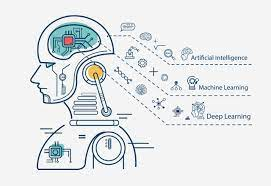
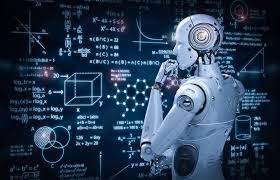
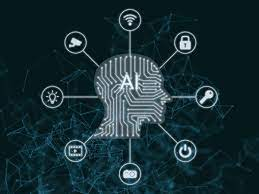
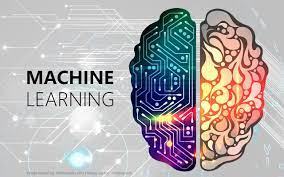
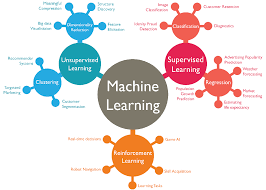
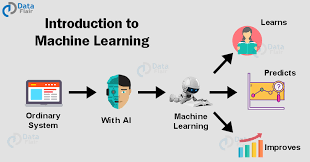
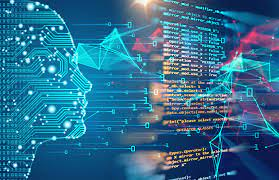
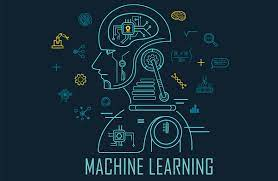
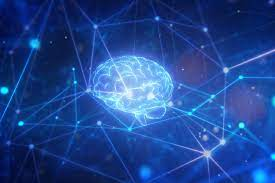
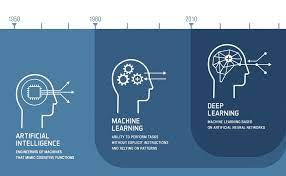
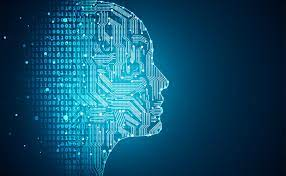
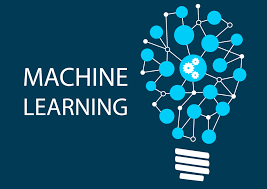
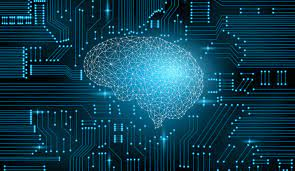
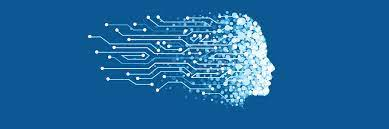
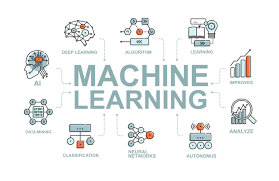
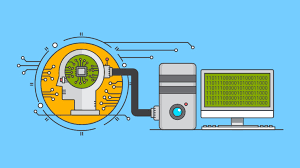
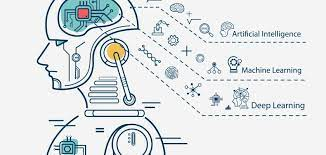
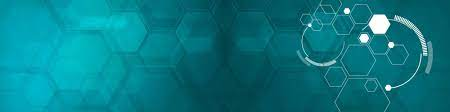
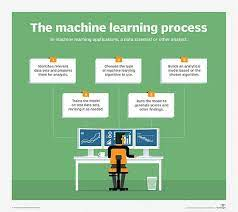
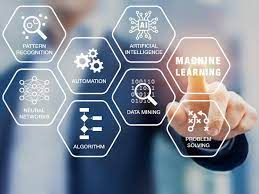

In [58]:
ml_img=[]
for i in ml_i:
    SRC_tag=i.get_attribute('src')
    ml_img.append(SRC_tag)
ml_img[0:100]

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on 
www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, 
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display 
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. 
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV.

In [77]:
driver = webdriver.Chrome("chromedriver.exe")
url='https://www.flipkart.com/'
driver.get(url)

In [78]:
close_pop_up=driver.find_element_by_xpath('//button[@class="_2KpZ6l _2doB4z"]')
close_pop_up.click()

In [79]:
src_button=driver.find_element_by_xpath('/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
src_button.send_keys('iphone')
src_button.send_keys(u'\ue007')

In [80]:
n=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
s_name=[]
for i in n:
    s_name.append(i.text)
s_name 

['APPLE iPhone 12 (Blue, 128 GB)',
 'APPLE iPhone SE (Black, 128 GB)',
 'APPLE iPhone 12 (White, 128 GB)',
 'APPLE iPhone SE (White, 64 GB)',
 'APPLE iPhone 12 (Purple, 64 GB)',
 'APPLE iPhone 12 (Red, 128 GB)',
 'APPLE iPhone 12 (Blue, 64 GB)',
 'APPLE iPhone 12 (Green, 128 GB)',
 'APPLE iPhone SE (White, 128 GB)',
 'APPLE iPhone SE (Red, 128 GB)',
 'APPLE iPhone 11 (Green, 128 GB)',
 'APPLE iPhone 11 (Black, 64 GB)',
 'APPLE iPhone 12 (White, 64 GB)',
 'APPLE iPhone 11 (Purple, 128 GB)',
 'Apple iPhone XR ((PRODUCT)RED, 64 GB) (Includes EarPods, Power Adapter)',
 'APPLE iPhone XR (White, 64 GB)',
 'APPLE iPhone 11 (White, 64 GB)',
 'APPLE iPhone 12 Mini (White, 128 GB)',
 'APPLE iPhone 12 (Black, 128 GB)',
 'APPLE iPhone 11 (Purple, 64 GB)',
 'APPLE iPhone 11 (Black, 128 GB)',
 'APPLE iPhone 11 (Red, 64 GB)',
 'APPLE iPhone 12 (White, 256 GB)',
 'APPLE iPhone 12 Mini (Black, 128 GB)']

In [81]:
p=driver.find_elements_by_xpath('//div[@class="_30jeq3 _1_WHN1"]')
price=[]
for i in p:
    price.append(i.text)
price

['₹72,999',
 '₹34,999',
 '₹72,999',
 '₹32,999',
 '₹67,999',
 '₹72,999',
 '₹67,999',
 '₹72,999',
 '₹34,999',
 '₹34,999',
 '₹56,999',
 '₹48,999',
 '₹67,999',
 '₹56,999',
 '₹41,999',
 '₹41,999',
 '₹51,999',
 '₹64,999',
 '₹72,999',
 '₹51,999',
 '₹56,999',
 '₹51,999',
 '₹82,999',
 '₹64,999']

In [82]:
r=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]//li[1]')
rom=[]
for i in r:
    rom.append(i.text)
rom

['128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '64 GB ROM',
 '64 GB ROM',
 '128 GB ROM',
 '64 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '64 GB ROM',
 '64 GB ROM',
 '128 GB ROM',
 '64 GB ROM',
 '64 GB ROM',
 '64 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '64 GB ROM',
 '128 GB ROM',
 '64 GB ROM',
 '256 GB ROM',
 '128 GB ROM']

In [92]:
c=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]//li[3]')
camera=[]
for i in c:
    camera.append(i.text)
camera

['12MP + 12MP | 12MP Front Camera',
 '12MP Rear Camera | 7MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP Rear Camera | 7MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP Rear Camera | 7MP Front Camera',
 '12MP Rear Camera | 7MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP Rear Camera | 7MP Front Camera',
 '12MP Rear Camera | 7MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '12MP + 12MP | 12MP Front Camera']

In [93]:
display=[]
d=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]//li[2]')
for i in d:
    display.append(i.text)
display

['15.49 cm (6.1 inch) Super Retina XDR Display',
 '11.94 cm (4.7 inch) Retina HD Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '11.94 cm (4.7 inch) Retina HD Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '11.94 cm (4.7 inch) Retina HD Display',
 '11.94 cm (4.7 inch) Retina HD Display',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '15.49 cm (6.1 inch) Display',
 '15.49 cm (6.1 inch) Display',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '13.72 cm (5.4 inch) Super Retina XDR Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '15.49 cm (6.1 inch) Liquid Reti

In [94]:
pr=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]//li[4]')
processor=[]
for i in pr:
    processor.append(i.text)
processor

['A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A13 Bionic Chip with 3rd Gen Neural Engine Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A13 Bionic Chip with 3rd Gen Neural Engine Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A13 Bionic Chip with 3rd Gen Neural Engine Processor',
 'A13 Bionic Chip with 3rd Gen Neural Engine Processor',
 'A13 Bionic Chip Processor',
 'A13 Bionic Chip Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A13 Bionic Chip Processor',
 'A12 Bionic Chip Processor',
 'A12 Bionic Chip Processor',
 'A13 Bionic Chip Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A14 Bionic Chip with Next Generation Neural Engine Processor',
 'A13 B

In [96]:
pr_url=driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
pro_url=[]
for i in pr_url:
    pro_url.append(i.get_attribute('href'))
pro_url

['https://www.flipkart.com/apple-iphone-12-blue-128-gb/p/itm02853ae92e90a?pid=MOBFWBYZKPTZF9VG&lid=LSTMOBFWBYZKPTZF9VG6GMIFT&marketplace=FLIPKART&q=iphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=ec954bef-ba1e-45a6-9061-676e85c30d6c.MOBFWBYZKPTZF9VG.SEARCH&ppt=hp&ppn=homepage&ssid=km7pqb7t9c0000001629452026895&qH=0b3f45b266a97d70',
 'https://www.flipkart.com/apple-iphone-se-black-128-gb/p/itma9285ccc6af28?pid=MOBFWQ6BHUEVZPXD&lid=LSTMOBFWQ6BHUEVZPXDUYSEZF&marketplace=FLIPKART&q=iphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=ec954bef-ba1e-45a6-9061-676e85c30d6c.MOBFWQ6BHUEVZPXD.SEARCH&ppt=hp&ppn=homepage&ssid=km7pqb7t9c0000001629452026895&qH=0b3f45b266a97d70',
 'https://www.flipkart.com/apple-iphone-12-white-128-gb/p/itm95393f4c6cc59?pid=MOBFWBYZBTZFGJF9&lid=LSTMOBFWBYZBTZFGJF9K5AZO1&marketplace=FLIPKART&q=iphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=ec954bef-ba1e-45a6-9061-676e85c30d6

In [97]:
flipkart_phones=pd.DataFrame()
flipkart_phones['s_name']=s_name
flipkart_phones['price']=price
flipkart_phones['rom']=rom
flipkart_phones['camera']=camera
flipkart_phones['display']=display
flipkart_phones['processor']=processor
flipkart_phones['pro_url']=pro_url
flipkart_phones

,s_name,price,rom,camera,display,processor,pro_url
0,"APPLE iPhone 12 (Blue, 128 GB)","₹72,999",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,https://www.flipkart.com/apple-iphone-12-blue-...
1,"APPLE iPhone SE (Black, 128 GB)","₹34,999",128 GB ROM,12MP Rear Camera | 7MP Front Camera,11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,https://www.flipkart.com/apple-iphone-se-black...
2,"APPLE iPhone 12 (White, 128 GB)","₹72,999",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,https://www.flipkart.com/apple-iphone-12-white...
3,"APPLE iPhone SE (White, 64 GB)","₹32,999",64 GB ROM,12MP Rear Camera | 7MP Front Camera,11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,https://www.flipkart.com/apple-iphone-se-white...
4,"APPLE iPhone 12 (Purple, 64 GB)","₹67,999",64 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,https://www.flipkart.com/apple-iphone-12-purpl...
5,"APPLE iPhone 12 (Red, 128 GB)","₹72,999",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,https://www.flipkart.com/apple-iphone-12-red-1...
6,"APPLE iPhone 12 (Blue, 64 GB)","₹67,999",64 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,https://www.flipkart.com/apple-iphone-12-blue-...
7,"APPLE iPhone 12 (Green, 128 GB)","₹72,999",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,https://www.flipkart.com/apple-iphone-12-green...
8,"APPLE iPhone SE (White, 128 GB)","₹34,999",128 GB ROM,12MP Rear Camera | 7MP Front Camera,11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,https://www.flipkart.com/apple-iphone-se-white...
9,"APPLE iPhone SE (Red, 128 GB)","₹34,999",128 GB ROM,12MP Rear Camera | 7MP Front Camera,11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,https://www.flipkart.com/apple-iphone-se-red-1...


5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on 
google maps.

In [98]:
#getting to the googlemaps page
driver= webdriver.Chrome("chromedriver.exe")
url= 'https://www.google.com/maps'
driver.get(url)

In [100]:
loc=driver.find_element_by_xpath('//input[@class="tactile-searchbox-input"]')
loc.send_keys('kolkata')
s=driver.find_element_by_xpath('/html/body/jsl/div[3]/div[10]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button')
s.click()

In [103]:
url_string = driver.current_url
url_string

'https://www.google.com/maps/place/Kolkata,+West+Bengal/@22.6017076,88.3564648,10.25z/data=!4m5!3m4!1s0x39f882db4908f667:0x43e330e68f6c2cbc!8m2!3d22.572646!4d88.363895'

In [109]:
lattitude= 22.6017076
longitude=88.3564648
print(lattitude,longitude)

22.6017076 88.3564648


6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in.


In [2]:
#getting to the page
driver= webdriver.Chrome("chromedriver.exe")
url= 'https://www.trak.in'
driver.get(url)

In [3]:
funding_deals = driver.find_element_by_xpath('//li[@id="menu-item-51510"]/a').get_attribute('href')
driver.get(funding_deals)

In [6]:
july_d=[]
j_date=driver.find_elements_by_xpath('//td[@class="column-2"]')
for i in j_date:
    july_d.append(i.text)
july_d

['01/04/2021',
 '05/04/2021',
 '14/04/2021',
 '07/04/2021',
 '14/04/2021',
 '04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021',
 '15/12/2020',
 '21/12/2020',
 '15/12/2020',
 '22/12/2020',
 '15/12/2020',
 '18/12/2020',
 '30/11/2020',
 '30/11/2020',
 '29/11/2020',
 '27/11/2020',
 '25/11/2020',
 '25/11/2020',
 '25/11/2020',
 '24/11/2020',
 '30/11/2020',
 '23/11/2020',
 '28/10/2020',
 '28/10/2020',
 '28/10/2020',
 '27/10/2020',
 '27/10/2020',
 '27/10/2020',
 '27/10/2020',
 '15/10/2020',
 '26/10/2020',
 '28/10/2020',
 '08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '15/08/2020',
 '13/08/20

In [7]:
industry=[]
indu_tag=driver.find_elements_by_xpath('//td[@class="column-4"]')
for i in indu_tag:
    industry.append(i.text)
industry

['Edu-tech',
 'E-commerce',
 'Online Food Delivery',
 'FinTech',
 'E-commerce',
 'E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce',
 'Food and Beverage',
 'Financial Services',
 'Technology Provider',
 'FinTech',
 'Supply chain',
 'SaaS',
 'EduTech',
 'Financial Services',
 'Food and Beverage',
 'Lifestyle',
 'Transportation',
 'SaaS',
 'Edutech',
 'FinTech',
 'Fintech',
 'Dairy Tech',
 'E-commerce',
 'Digital Solutions',
 'FinTech',
 'FinTech',
 'E-commerce',
 'AgriTech',
 'Advertising',
 'Hospitality',
 'Information Technology',
 'FinTech',
 'EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerc

In [8]:
sub_verticle=[]
sub=driver.find_elements_by_xpath('//td[@class="column-5"]')
for i in sub:
    sub_verticle.append(i.text)
sub_verticle 

['Online tutoring',
 'Online reselling platform',
 'Online Food Delivery',
 'Investment platform',
 'Global B2B marketplace',
 'Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies',
 'Craft Beer',
 'Payment Solutions Provider',
 

In [9]:
location=[]
loc=driver.find_elements_by_xpath('//td[@class="column-6"]')
for i in loc:
    location.append(i.text)
location

['Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Mumbai',
 'Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru',
 'New Delhi',
 'Noida',
 'Washington',
 'Mumbai',
 'Gurgaon',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'New Delhi',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurugram',
 'Mumbai',
 'Bangalore',
 'Mumbai',
 'Mumbai',
 'Bangalore',
 'Gurgaon',
 'Mumbai',
 'Bangalore',
 'Wilmington, Delaware, United States',
 'Mumbai',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',

In [10]:
investor=[]
inv=driver.find_elements_by_xpath('//td[@class="column-7"]')
for i in inv:
    investor.append(i.text)
investor

['Innoven Capital',
 'SoftBank Vision Fund 2',
 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments',
 'MC Global Edtech, B Capital, Baron, others',
 'Hindustan Media Ventures',
 'Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others',
 'Nishant Mittal, Pankaj Chaddah a

In [11]:
investment_type=[]
iv_t=driver.find_elements_by_xpath('//td[@class="column-8"]')
for i in iv_t:
    investment_type.append(i.text)
investment_type

['Series F',
 'Series E',
 'Series J',
 'Series D',
 'Venture',
 'Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed',
 'Funding',
 'Secondary Market',
 'Series D',
 'Seed',
 'Secondary Market',
 'Series A',
 'Seed',
 'Series C',
 'Bridge Funding',
 'Pre-series E',
 'Series A',
 'Series A',
 'Venture',
 'Series B',
 'Pre-Series A',
 'Series C',
 'Personal Investment',
 'Series B',
 'Equity and Debt',
 'Seed',
 'Series C',
 'Debt',
 'Series A',
 '',
 'Seed',
 'Follow-On',
 'Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'M&A',
 'Series D

In [12]:
amount=[]
amt=driver.find_elements_by_xpath('//td[@class="column-9"]')
for i in amt:
    amount.append(i.text)
amount

['460,000,000',
 '300,000,000',
 '343,000,000',
 '83,000,000',
 '7,400,000',
 '250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000',
 '1,273,634.07',
 'Undisclosed',
 '160,000,000',
 '1,000,000',
 '25,000,000',
 '15,000,000',
 '560,000',
 '80,000,000',
 '3,000,000',
 '1,001,047.92',
 '7,700,000',
 '6,003,806',
 '75,000,000-100,000,000',
 '35,300,000',
 '3,500,000',
 '25,000,000',
 'NA',
 '10,000,000',
 '20,160,000',
 '5,000,000',
 '121,000,000',
 '4,700,000',
 '15,000,000',
 '6,000,000',
 '4,500,000',
 '4,500,000',
 '500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 '32,000,000',
 '23,0

In [13]:
trak=pd.DataFrame()
trak['Date']=july_d[0:30]
trak['INDUSTRY']=industry[0:30]
trak['SubVertical']=sub_verticle[0:30]
trak['LOCATION']=location[0:30]
trak['INVESTOR']=investor[0:30]
trak['INVESTMENT_TYPE']=investment_type[0:30]
trak['AMOUNT']=amount[0:30]
trak

,Date,INDUSTRY,SubVertical,LOCATION,INVESTOR,INVESTMENT_TYPE,AMOUNT
0,01/04/2021,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,"460,000,000"
1,05/04/2021,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,"300,000,000"
2,14/04/2021,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,"343,000,000"
3,07/04/2021,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,"83,000,000"
4,14/04/2021,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,"7,400,000"
5,04/03/2021,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
6,31/03/2021,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
7,30/03/2021,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
8,30/03/2021,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
9,23/03/2021,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"


7. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [20]:
#getting to the page
driver= webdriver.Chrome("chromedriver.exe")
url= 'https://www.digit.in/'
driver.get(url)
time.sleep(2)

In [23]:
top_10=driver.find_element_by_xpath("/html/body/div[1]/div/div[4]/ul/li[4]")
top_10.click()

In [24]:
laptop=driver.find_element_by_xpath("/html/body/div[3]/div/div/div[3]/div[2]/ul/li[26]")
laptop.click()

In [26]:
product_name=[]
p_n=driver.find_elements_by_xpath("//div[@class='right-container']/div/a/h3")
for i in p_n:
    product_name.append(i.text)
product_name 

['ALIENWARE AREA 51M R2',
 'ALIENWARE M15 R3',
 'ASUS ROG STRIX SCAR 15',
 'ASUS ROG ZEPHYRUS G14',
 'LENOVO LEGION 5I',
 'ASUS ROG ZEPHYRUS DUO 15',
 'ACER ASPIRE 7 GAMING']

In [30]:
details=[]
o_s=driver.find_elements_by_xpath('//div[@class="product-detail"]')
for i in o_s:
    details.append(i.text.replace('\n','-'))
details 

['OS-WINDOWS 10 HOME-DISPLAY-17.3" (1920 X 1080)-PROCESSOR-10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ-MEMORY-1 TB SSD/16 GBGB DDR4-FULL SPECS OTHER ALIENWARE LAPTOPS',
 'OS-WINDOWS 10 HOME-DISPLAY-15.6" (3840 X 2160)-PROCESSOR-10TH GENERATION INTEL® CORE™ I9-10980HK | NA-MEMORY-1 TB SSD/16 GBGB DDR4-FULL SPECS OTHER ALIENWARE LAPTOPS',
 'OS-WINDOWS 10 HOME-DISPLAY-15.6" (1920 X 1080)-PROCESSOR-AMD RYZEN™ 9 5900HX | 3.3 GHZ-MEMORY-1 TB SSD/16 GBGB DDR4-READ REVIEW FULL SPECS OTHER ASUS LAPTOPS',
 'OS-WINDOWS 10 HOME-DISPLAY-14" (1920 X 1080)-PROCESSOR-AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ-MEMORY-1 TB SSD/16 GBGB DDR4-READ REVIEW FULL SPECS OTHER ASUS LAPTOPS',
 'OS-WINDOWS 10 PRO-DISPLAY-15.6" (1920 X 1080)-PROCESSOR-10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ-MEMORY-1 TB SSD/16 GBGB DDR4-FULL SPECS OTHER LENOVO LAPTOPS',
 'OS-WINDOWS 10-DISPLAY-15.6" (3840 X 1100)-PROCESSOR-INTEL CORE I7 10TH GEN 10875H | NA-MEMORY-512 GB SSD/4 GBGB DDR4-FULL SPECS OTHER ASUS LAPTOPS',
 'OS-

In [31]:
digit_lap=pd.DataFrame()
digit_lap['product_name']=product_name
digit_lap['details']=details
digit_lap

,product_name,details
0,ALIENWARE AREA 51M R2,"OS-WINDOWS 10 HOME-DISPLAY-17.3"" (1920 X 1080)..."
1,ALIENWARE M15 R3,"OS-WINDOWS 10 HOME-DISPLAY-15.6"" (3840 X 2160)..."
2,ASUS ROG STRIX SCAR 15,"OS-WINDOWS 10 HOME-DISPLAY-15.6"" (1920 X 1080)..."
3,ASUS ROG ZEPHYRUS G14,"OS-WINDOWS 10 HOME-DISPLAY-14"" (1920 X 1080)-P..."
4,LENOVO LEGION 5I,"OS-WINDOWS 10 PRO-DISPLAY-15.6"" (1920 X 1080)-..."
5,ASUS ROG ZEPHYRUS DUO 15,"OS-WINDOWS 10-DISPLAY-15.6"" (3840 X 1100)-PROC..."
6,ACER ASPIRE 7 GAMING,"OS-WINDOWS 10 HOME-DISPLAY-15.6"" (1920 X 1080)..."


8. Write a python program to scrape the details for all billionaires from www.forbes.com. 
Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, 
“Industry”.

In [32]:
#getting to the page
driver= webdriver.Chrome("chromedriver.exe")
url= 'https://www.forbes.com/?sh=719b91242254'
driver.get(url)
time.sleep(2)

In [33]:
billionaires=driver.find_element_by_xpath("/html/body/div[1]/main/section[8]/div[1]")
billionaires.click()

In [35]:
worlds_billionaires=driver.find_element_by_xpath("/html/body/div[1]/main/div/section/section[1]/div/div/div[1]/div/div[1]/div[1]/div[2]/a/h2")
worlds_billionaires.click()

In [37]:
Name=[]
n=driver.find_elements_by_xpath('//div[@class="personName"]')
for i in n:
    Name.append(i.text.replace('\n','-'))
Name

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [38]:
Rank=[]
r=driver.find_elements_by_xpath('//div[@class="rank"]')
for i in r:
    Rank.append(i.text.replace('\n','-'))
Rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [39]:
Net_Worth=[]
nw=driver.find_elements_by_xpath('//div[@class="netWorth"]')
for i in nw:
    Net_Worth.append(i.text.replace('\n','-'))
Net_Worth

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [43]:
age=[]
ag=driver.find_elements_by_xpath("//div[@class='age']")
for i in ag:
    age.append(i.text.replace('\n','-'))
age

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [44]:
Citizen=[]
ct=driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')
for i in ct:
    Citizen.append(i.text.replace('\n','-'))
Citizen

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [48]:
Source=[]
sor=driver.find_elements_by_xpath('//div[@class="source"]')
for i in sor:
    Source.append(i.text.replace('\n','-'))
time.sleep(1)    
Source

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [51]:
ind=[]
industries= driver.find_elements_by_xpath("//div[@class='category']//div")
for i in industries:
    ind.append(i.text)
ind

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [53]:
forbes=pd.DataFrame()
forbes['Ranking']=Rank[0:200]
forbes['Name']=Name[0:200]
forbes['NetWorth']=Net_Worth[0:200]
forbes['Citizen']=Citizen[0:200]
forbes['Source']=Source[0:200]
forbes['Industry']=ind[0:200]
forbes['Age']=age[0:200]
forbes

,Ranking,Name,NetWorth,Citizen,Source,Industry,Age
0,1.,Jeff Bezos,$177 B,United States,,,
1,2.,Elon Musk,$151 B,United States,,,
2,3.,Bernard Arnault & family,$150 B,France,,,
3,4.,Bill Gates,$124 B,United States,,,
4,5.,Mark Zuckerberg,$97 B,United States,,,
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,Australia,,,
196,197.,Leonid Fedun & family,$11.1 B,Russia,,,
197,197.,Eyal Ofer,$11.1 B,Israel,,,
198,197.,Evan Spiegel,$11.1 B,United States,,,


9. Write a program to extract at least 500 Comments, Comment upvote and time when comment 
was posted from any YouTube Video.

In [55]:
#For obtaining address for youtube-video 
driver= webdriver.Chrome("chromedriver.exe")
url='https://www.youtube.com/watch?v=f-g_SHNv5NI&list=RDf-g_SHNv5NI&start_radio=1'
driver.get(url)

In [57]:
cmt_tag=driver.find_elements_by_id("content")
cmt_tag

[<selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="5a25673c-3213-4ca0-8b56-b6966dd3e1ab")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="4fd908a8-1983-4490-bba1-953f733624df")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="1e131772-da1c-42f4-b1d0-57551e0cec13")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="589a53e3-ba11-47fe-b8ba-9d15f56966c4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="9838427c-156c-4f2a-8096-3efd3f0766fe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="0d12b63c-c385-4285-b3f4-cdb2ea919a54")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="a75f06a5-fe56-4084-93b3-b3

In [58]:
cmt=driver.find_elements_by_class_name('style-scope ytd-comment-renderer')
cmt[0:500]

[<selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="e9acabe1-6a86-41a9-8a60-ec281fc31f7d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="a0006ba1-1bb5-4a97-b7f2-3725e96e33b3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="04904cd9-bbad-49a8-b87b-b01d685d92cc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="da6b050c-5b50-4f75-905d-38e3d1e10e32")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="f406bb09-d2a9-4039-a736-ae037db7fb94")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="06d5fb76-c536-4324-ada8-7f525c3cebfb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="483e6c42-5093-435c-97fa-8b

In [59]:
cm=[]
for i in cmt:
    time.sleep(5)
    cm.append(i.text.replace)
cm[0:500]

['SILVER SPADES\n8 months ago\nThis Album is a music and cinematic masterpiece\n24K\nREPLY',
 'maher channel قناة ماهر\n2 months ago\nwow great camera work. was the cameraman suspended from a helicopter?\n1.4K\nREPLY',
 'A. Nahari\n2 months ago\nMichael Jackson would’ve appreciated this work.\n1.5K\nREPLY',
 'TurdBallQuest\n1 month ago\nNo autotune at all, just pure talent.\n214\nREPLY',
 'Alejandra Valenciano\n1 month ago\nLo amo mucho.\n4\nREPLY',
 'Key Epic\n7 months ago\nCan’t wait for the Super Bowl performance, this man will make history.\n1.8K\nREPLY',
 'omfgimgettingpissed\n3 weeks ago\nI hope this guy is around for a long time. His music and voice are flawless.\n90\nREPLY',
 'Jazmín\n2 weeks ago\nFuaaa, es que estoy comenzando a ser su fan amo su vos 🖤🖤 están única...\n6\nREPLY',
 'Patricia Sousa\n4 weeks ago\nEu amo essa música 💗😻💗😻\n3\nREPLY',
 "Yahya Oa\n2 months ago\nThis is hands down the greatest performance I've ever seen, Abel's incredible vocal stability and choreogra

In [60]:
upvote_tag=driver.find_elements_by_id('vote-count-middle')
upvote_tag[0:500]

[<selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="c420ab0e-6735-4cca-b226-51deade76c47")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="1aa0568e-b76b-4c4f-a610-fd59f8d14d91")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="3bff13b2-33ca-4e15-98d7-fa3d3c721120")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="4d2e5be0-3559-48b8-8500-229a991e232f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="368c4227-d9e4-4ff9-9d8d-69158e60aabe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="ae3a7ac3-d85b-4a08-93b8-863e0fbe3caf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="9de3c3e4-e852-4534-a922-2d

In [61]:
Comment_upvote=[]
for i in upvote_tag:
    Comment_upvote.append(i.text.replace("/n"," "))
Comment_upvote[0:500]

['24K',
 '1.4K',
 '1.5K',
 '214',
 '4',
 '1.8K',
 '90',
 '6',
 '3',
 '63',
 '7.4K',
 '10',
 '3',
 '22',
 '1',
 '3K',
 '10',
 '19',
 '9',
 '3']

In [62]:
com_t=driver.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]')
com_t[0:500]

[<selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="bb9e5de2-bb2c-4b7f-bbd9-f79f428d074c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="f248b2ab-20fd-4f0f-9863-298e3e3ae2fd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="e43254f4-7c40-4f47-a7c4-7c09d401dfe0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="0d076994-39bd-41c2-8c23-c2d9c668db34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="06426289-b30c-4117-ab43-46cb221bcd11")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="193215fa-ec65-4de2-b327-fb7026b2409a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d0084264b9a170d3b256ea403dd5304a", element="ec99266b-8153-4934-b78c-cc

In [63]:
time=[]
for i in com_t:
    time.append(i.text)
time    

['8 months ago',
 '2 months ago',
 '2 months ago',
 '1 month ago',
 '1 month ago',
 '7 months ago',
 '3 weeks ago',
 '2 weeks ago',
 '4 weeks ago',
 '2 months ago',
 '8 months ago',
 '3 days ago',
 '2 months ago',
 '4 days ago',
 '2 days ago',
 '8 months ago (edited)',
 '1 month ago',
 '2 months ago',
 '5 days ago',
 '1 week ago']

In [66]:
youtube=pd.DataFrame()
youtube['comment']=cm
youtube['Upvote']=Comment_upvote
youtube['time']=time
youtube

,comment,Upvote,time
0,SILVER SPADES\n8 months ago\nThis Album is a m...,24K,8 months ago
1,maher channel قناة ماهر\n2 months ago\nwow gre...,1.4K,2 months ago
2,A. Nahari\n2 months ago\nMichael Jackson would...,1.5K,2 months ago
3,TurdBallQuest\n1 month ago\nNo autotune at all...,214,1 month ago
4,Alejandra Valenciano\n1 month ago\nLo amo much...,4,1 month ago
5,Key Epic\n7 months ago\nCan’t wait for the Sup...,1.8K,7 months ago
6,omfgimgettingpissed\n3 weeks ago\nI hope this ...,90,3 weeks ago
7,"Jazmín\n2 weeks ago\nFuaaa, es que estoy comen...",6,2 weeks ago
8,Patricia Sousa\n4 weeks ago\nEu amo essa músic...,3,4 weeks ago
9,Yahya Oa\n2 months ago\nThis is hands down the...,63,2 months ago


10. Write a python program to scrape a data for all available Hostels from 
https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, 
distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms 
from price, facilities and property description.

In [68]:
driver= webdriver.Chrome("chromedriver.exe")
url='https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2021-07-08&to=2021-07-11&guests=2&page=1'
driver.get(url)

In [70]:
hn=driver.find_elements_by_xpath('//h2[@class="title title-6"]')
name=[]
for i in hn:
    name.append(i.text)
name

['London Waterloo Hostel',
 'Barmy Badger Backpackers',
 "Wombat's The City Hostel London",
 'Prime Backpackers Angel',
 "St Christopher's Village",
 'PubLove @ The Steam Engine, Waterloo',
 'PubLove @ The Crown, Battersea',
 'The Dictionary Hostel',
 'Safestay London Elephant & Castle',
 'Urbany Hostel London',
 'PubLove @ The Green Man, Paddington',
 'Mornington Camden',
 'PubLove @ The Rose & Crown',
 'New Cross Inn Hostel',
 'Strand Continental',
 "St Christopher's Oasis-Female Only",
 'Astor Museum Inn',
 'Astor Kensington',
 'Mapesbury Hostel',
 'Astor Hyde Park',
 'Phoenix Hostel',
 '247london Hostel and Private Rooms',
 'Burlington Residence',
 'SoHostel',
 'Clink261',
 'Generator London',
 'PubLove @ The White Ferry, Victoria',
 'Smart Russell Square Hostel',
 'Keystone House Kings Cross',
 'Smart Hyde Park View Hostel']

In [72]:
d=driver.find_elements_by_xpath('//span[@class="description"]')
distance=[]
for i in d:
    distance.append(i.text)
distance 

['Hostel - 0.7km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 5.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 1.6km from city centre',
 'Hostel - 6.1km from city centre',
 'Hostel - 1.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 4.2km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 2.6km from city centr

In [73]:
r=driver.find_elements_by_xpath('//div[@class="score orange big"]')
rating=[]
for i in r:
    rating.append(i.text)
rating

['7.6',
 '10',
 '9.2',
 '10',
 '8.9',
 '9.0',
 '6.7',
 '8.2',
 '10',
 '10',
 '7.4',
 '7.2',
 '8.3',
 '9.1',
 '9.5',
 '8.7',
 '9.1',
 '8.3',
 '6.6',
 '9.8',
 '8.6',
 '7.6',
 '7.6',
 '8.9',
 '7.3',
 '9.1',
 '8.2']

In [74]:
to_r=driver.find_elements_by_xpath('//div[@class="reviews"]')
total_reviews=[]
for i in to_r:
    total_reviews.append(i.text)
total_reviews

['2409 Total Reviews',
 '1652 Total Reviews',
 '13140 Total Reviews',
 '513 Total Reviews',
 '10827 Total Reviews',
 '189 Total Reviews',
 '208 Total Reviews',
 '3 Total Reviews',
 '3952 Total Reviews',
 '106 Total Reviews',
 '392 Total Reviews',
 '41 Total Reviews',
 '99 Total Reviews',
 '1004 Total Reviews',
 '773 Total Reviews',
 '594 Total Reviews',
 '8714 Total Reviews',
 '6326 Total Reviews',
 '357 Total Reviews',
 '11326 Total Reviews',
 '3420 Total Reviews',
 '443 Total Reviews',
 '26 Total Reviews',
 '3960 Total Reviews',
 '3172 Total Reviews',
 '6737 Total Reviews',
 '134 Total Reviews',
 '9503 Total Reviews',
 '8111 Total Reviews',
 '4473 Total Reviews']

In [76]:
facilities=[]
f = driver.find_elements_by_xpath('//div[@class="facilities-label facilities"]')
for i in f:
    facilities.append(i.text)
facilities

['Free WiFi\nFree Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast',
 'Free Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi',
 'Free WiFi\nFree Breakfast\nFo

In [80]:
prices=[]
p = driver.find_elements_by_xpath('//div[@class="price-col"]')
for i in p:
    prices.append(i.text.replace('\n','-'))
prices    

['No Privates Available',
 'Dorms From-Rs1368',
 'Privates From-Rs5066',
 'No Dorms Available',
 'Privates From-Rs7919',
 'Dorms From-Rs1744',
 'Privates From-Rs6039',
 'Dorms From-Rs2397',
 'Privates From-Rs3445',
 'Dorms From-Rs1256',
 'Privates From-Rs19453',
 'Dorms From-Rs1520',
 'Privates From-Rs8608',
 'Dorms From-Rs1520',
 'Privates From-Rs6586',
 'Dorms From-Rs1519',
 'Privates From-Rs5471',
 'Dorms From-Rs1824',
 'Privates From-Rs4330',
 'Dorms From-Rs1824',
 'Privates From-Rs8614',
 'Dorms From-Rs1520',
 'No Privates Available',
 'Dorms From-Rs3176',
 'Privates From-Rs6079',
 'Dorms From-Rs1520',
 'Privates From-Rs2946',
 'Dorms From-Rs1127',
 'Privates From-Rs4559',
 'Dorms From-Rs1733',
 'Privates From-Rs3445',
 'Dorms From-Rs1408',
 'Privates From-Rs4053',
 'Dorms From-Rs1824',
 'Privates From-Rs7295',
 'Dorms From-Rs1520',
 'Privates From-Rs4559',
 'No Dorms Available',
 'Privates From-Rs4053',
 'Dorms From-Rs1520',
 'Privates From-Rs2079',
 'Dorms From-Rs1334',
 'Privat

In [82]:
hostel_url=[]
urls = driver.find_elements_by_xpath('//h2[@class="title title-6"]//a')
for i in urls:
    hostel_url.append(url.get_attribute("href"))
hostel_url    

['https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021-08-22&to=2021-08-23&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Waterloo-Hostel/London/39493?from=2021

In [85]:
hostel=pd.DataFrame()
hostel['distance']=distance[0:25]
hostel['name']=name[0:25]
hostel['rating']=rating[0:25]
hostel['total_reviews']=total_reviews[0:25]
hostel['facilities']=facilities[0:25]
hostel['prices']=prices[0:25]
hostel['hostel_url']=hostel_url[0:25]
hostel

,distance,name,rating,total_reviews,facilities,prices,hostel_url
0,Hostel - 0.7km from city centre,London Waterloo Hostel,7.6,2409 Total Reviews,Free WiFi\nFree Breakfast\nFollows Covid-19 sa...,No Privates Available,https://www.hostelworld.com/pwa/hosteldetails....
1,Hostel - 5.5km from city centre,Barmy Badger Backpackers,10,1652 Total Reviews,Free WiFi\nFree Breakfast,Dorms From-Rs1368,https://www.hostelworld.com/pwa/hosteldetails....
2,Hostel - 3.6km from city centre,Wombat's The City Hostel London,9.2,13140 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From-Rs5066,https://www.hostelworld.com/pwa/hosteldetails....
3,Hostel - 3.6km from city centre,Prime Backpackers Angel,10,513 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,No Dorms Available,https://www.hostelworld.com/pwa/hosteldetails....
4,Hostel - 1.8km from city centre,St Christopher's Village,8.9,10827 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From-Rs7919,https://www.hostelworld.com/pwa/hosteldetails....
5,Hostel - 0.5km from city centre,"PubLove @ The Steam Engine, Waterloo",9.0,189 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Dorms From-Rs1744,https://www.hostelworld.com/pwa/hosteldetails....
6,Hostel - 4.7km from city centre,"PubLove @ The Crown, Battersea",6.7,208 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From-Rs6039,https://www.hostelworld.com/pwa/hosteldetails....
7,Hostel - 4.1km from city centre,The Dictionary Hostel,8.2,3 Total Reviews,Free WiFi,Dorms From-Rs2397,https://www.hostelworld.com/pwa/hosteldetails....
8,Hostel - 1.7km from city centre,Safestay London Elephant & Castle,10,3952 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From-Rs3445,https://www.hostelworld.com/pwa/hosteldetails....
9,Hostel - 5.4km from city centre,Urbany Hostel London,10,106 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Dorms From-Rs1256,https://www.hostelworld.com/pwa/hosteldetails....
